# Assessment Problems

In [ ]:
# Binomial distribution.# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html
import math

# Permutations and combinations.
# https://docs.python.org/3/library/itertools.html
import itertools

# Random selections.
# https://docs.python.org/3/library/random.html
import random

# Data manipulation and analysis.
# https://pandas.pydata.org/docs/
import pandas as pd

# Numerical structures and operations.
# https://numpy.org/doc/
import numpy as np

# Plotting.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

# Statistics.
# https://docs.scipy.org/doc/scipy/reference/stats.html
import scipy.stats as stats

# Statistical models.
# https://www.statsmodels.org/stable/index.html
import statsmodels as sm

## Problem 1: Extending the Lady Tasting Tea

Problem 1: Extending the Lady Tasting Tea
Let's extend the Lady Tasting Tea experiment as follows. The original experiment has 8 cups: 4 tea-first and 4 milk-first. Suppose we prepare 12 cups: 8 tea-first and 4 milk-first. A participant claims they can tell which was poured first.

Simulate this experiment using numpy by randomly shuffling the cups many times and calculating the probability of the participant correctly identifying all cups by chance. Compare your result with the original 8-cup experiment.

In your notebook, explain your simulation process clearly, report and interpret the estimated probability, and discuss whether, based on this probability, you would consider extending or relaxing the p-value threshold compared to the original design.

In [675]:
# problem 1 : Lady Tasting Tea experiment
# Author: Finian Doonan

## Simulating the “Tea-First vs Milk-First” Experiment

A participant claims they can tell which of 12 cups were poured **tea-first** versus **milk-first**.  

We will simulate this experiment to estimate the probability of correctly identifying all cups **by chance**.

### Steps

1. **Prepare the cups**
   - Total cups: 12
   - Tea-first: 8 cups
   - Milk-first: 4 cups

2. **Simulation procedure**
   - Randomly **shuffle the cups** to simulate a participant guessing
   - Repeat this process **many times** (e.g., 100,000 simulations)
   - For each shuffle, check if the participant **correctly identifies all 12 cups**
   - Record the proportion of successful guesses  
     → This gives the **probability of guessing all cups correctly by chance**

3. **Comparison**
   - Compare this probability with the **original 8-cup experiment**
   - Observe how increasing the number of cups **reduces the chance of guessing correctly**

### Objective

This simulation illustrates:
- How **random chance affects experimental outcomes**
- How **increasing the number of trials** makes it harder to succeed purely by guessing
- The importance of **simulating experiments** to estimate probabilities in complex scenarios


## Permutations and combinations.

In [676]:
# Number of cups of tea in total.
no_cups = 12

# Number of cups of tea with milk in first.
no_cups_milk_first = 4

# Number of cups of tea with tea in first.
no_cups_tea_first = 8

# Number of simulations to run.
no_simulations = 100000

successes = 0
for _ in range(no_simulations):
    # Create cups.
    cups = ['milk_first'] * no_cups_milk_first + ['tea_first'] * no_cups_tea_first

    # Shuffle cups.
    random.shuffle(cups)

    # Lady's selection (first four cups).
    lady_selection = cups[:4]

    # Count milk first in lady's selection.
    milk_first_count = lady_selection.count('milk_first')

    # Check if lady was correct (i.e., selected all four milk first cups).
    if milk_first_count == no_cups_milk_first:
        successes += 1

# Calculate probability of success.
prob = successes / no_simulations   
# Show probability.
prob

0.00195

## Formula

In mathematics, the `math.comb()` function is called the *choose* function.

It is written and calculated as

$\binom{n}{k} = \frac{n!}{k!(n-k)!}$.


In [677]:
# Number of cups of tea in total.
n = 12

In [678]:
# Number of cups of tea with milk in first.
k = 4

In [679]:
# Number of ways of selecting four cups from eight.
number_ways = math.comb(no_cups, no_cups_milk_first)

# Show.
number_ways

495

In [680]:
# Total number of ways of selecting four cups from twelve, keeping them in order.
ways_ordered = 12 * 11 * 10 * 9

# Show.
ways_ordered

11880

In [681]:
# No of ways of shuffling four cups.
no_shuffles = 4 * 3 * 2 * 1

# Show.
no_shuffles

24

In [682]:
# No of combinations.
no_combs = ways_ordered // no_shuffles

# Show.
no_combs

495

In [683]:
prob = successes / no_simulations

print(f"Simulated probability of success: {prob:.6f}")

Simulated probability of success: 0.001950


## math.factorial

https://docs.python.org/3.12/library/math.html#math.factorial

Mathematically denoted as `n!`.

Multiply all positive integers from `n` down to 1.


`n! = n x (n - 1) x (n - 2) x ... x 1`

e.g. `5! = 5 x 4 x 3 x 2 x 1 = 120`

In [684]:
# Eight factorial.
math.factorial(n)

479001600

In [685]:
# Four factorial.
math.factorial(k)

24

In [686]:
# Four factorial.
math.factorial(n - k)

40320

In [687]:
# No of ways of selecting k objects from n without replacement and without order.
math.factorial(n) // (math.factorial(k) * math.factorial(n - k))#

495

So by pure chance, there’s only about a 0.2% chance (1 in 495) of correctly identifying all cups.

In [688]:
# The cup labels.
labels = list(range(no_cups))

# Show.
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [689]:
# Correct usage: pass the sequence (or an integer) to np.random.permutation.
# Use the existing `labels` list to get a shuffled ordering of the cups.
shuffled = np.random.permutation(labels)
shuffled

array([ 4, 11,  5,  0,  2,  8,  6,  7,  9, 10,  1,  3])

In [690]:
# Show the different ways of selecting no_cups_milk_first out of no_cups cups of tea.
combs = list(itertools.combinations(labels, no_cups_milk_first))

# Show.
combs

[(0, 1, 2, 3),
 (0, 1, 2, 4),
 (0, 1, 2, 5),
 (0, 1, 2, 6),
 (0, 1, 2, 7),
 (0, 1, 2, 8),
 (0, 1, 2, 9),
 (0, 1, 2, 10),
 (0, 1, 2, 11),
 (0, 1, 3, 4),
 (0, 1, 3, 5),
 (0, 1, 3, 6),
 (0, 1, 3, 7),
 (0, 1, 3, 8),
 (0, 1, 3, 9),
 (0, 1, 3, 10),
 (0, 1, 3, 11),
 (0, 1, 4, 5),
 (0, 1, 4, 6),
 (0, 1, 4, 7),
 (0, 1, 4, 8),
 (0, 1, 4, 9),
 (0, 1, 4, 10),
 (0, 1, 4, 11),
 (0, 1, 5, 6),
 (0, 1, 5, 7),
 (0, 1, 5, 8),
 (0, 1, 5, 9),
 (0, 1, 5, 10),
 (0, 1, 5, 11),
 (0, 1, 6, 7),
 (0, 1, 6, 8),
 (0, 1, 6, 9),
 (0, 1, 6, 10),
 (0, 1, 6, 11),
 (0, 1, 7, 8),
 (0, 1, 7, 9),
 (0, 1, 7, 10),
 (0, 1, 7, 11),
 (0, 1, 8, 9),
 (0, 1, 8, 10),
 (0, 1, 8, 11),
 (0, 1, 9, 10),
 (0, 1, 9, 11),
 (0, 1, 10, 11),
 (0, 2, 3, 4),
 (0, 2, 3, 5),
 (0, 2, 3, 6),
 (0, 2, 3, 7),
 (0, 2, 3, 8),
 (0, 2, 3, 9),
 (0, 2, 3, 10),
 (0, 2, 3, 11),
 (0, 2, 4, 5),
 (0, 2, 4, 6),
 (0, 2, 4, 7),
 (0, 2, 4, 8),
 (0, 2, 4, 9),
 (0, 2, 4, 10),
 (0, 2, 4, 11),
 (0, 2, 5, 6),
 (0, 2, 5, 7),
 (0, 2, 5, 8),
 (0, 2, 5, 9),
 (0, 2, 5, 10),
 (

In [691]:
# Number of combinations.
len(combs)

495

By increasing to 12 cups (8T, 4M), the chance drops to 0.2%, roughly 7 times less likely to get all right by luck.

In [692]:
# Select four cups at random to put milk in first.
# https://docs.python.org/3/library/random.html#random.sample
labels_milk = random.sample(labels, 4)

# Sort, inplace.
labels_milk.sort()

# Show.
labels_milk

[3, 5, 9, 11]

## The Null Hypothesis


- The lady has no special power to tell the difference between cups of tea with milk in first and cups of tea with tea in first.

- The lady is selecting the four cups from the twelve, cups at random.

## Alternative Hypothesis

- The lady can tell the difference. 

### Evidence

Fisher: if the lady is just picking four cups at random, then it is unlikely she will pick the correct four. The probability is one in seventy. It is so unlikely, that I will agree that something non-random is happening when she is selecting the cups of tea. 

In [693]:
# The probability that she (randomly) selects the four correct cups.
1 / 495

0.00202020202020202

In [694]:
# The probability that she (randomly) selects at least three correct cups.
( 16+ 1) / 495

0.03434343434343434

##  give explanations and insights into your code

## Problem 2: Normal Distribution

## Sampling Distribution of Standard Deviation

We will investigate the behavior of **sample standard deviation** versus **population standard deviation** using repeated samples from the standard normal distribution.

### Steps

1. **Generate samples**
   - Number of samples: 100,000
   - Sample size: 10
   - Distribution: Standard normal \(N(0,1)\)

2. **Compute standard deviations**
   - For each sample:
     - **Sample SD**: using `ddof=1` (unbiased estimator)
     - **Population SD**: using `ddof=0`

3. **Visualize distributions**
   - Plot histograms of both sets of standard deviations on the **same axes**
   - Use **transparency** (e.g., `alpha=0.5`) to compare the distributions

4. **Analyze differences**
   - Observe how the **sample SD tends to be slightly larger on average** than the population SD for small sample sizes
   - Explain the effect of **sample size**:
     - As the sample size increases, the **difference between sample SD and population SD decreases**
     - Both distributions become more concentrated around the true standard deviation

### Objective

This exercise illustrates:
- The **bias in the population SD formula** when using small samples
- How **sample size affects the accuracy** of the sample standard deviation as an estimator of the population SD


In [695]:
# problem 2: Normal Distribution
# Author: Finian Doonan

np.random.binomial(10, 0.5)

7

In [ ]:
# Number of samples to generate
num_samples = 100000  

# Binomial parameters
n = 10      # number of Bernoulli trials per draw
p = 0.5     # probability of success in each trial
sample_size = 10  # size of each sample for SD calculation

# Generate 100,000 binomial random variables
# Each element represents the number of successes in 10 trials
samples = np.random.binomial(n, p, num_samples)

# Display the array of 100,000 integers (values 0–10)
samples


array([3, 7, 6, ..., 6, 6, 4])

In [ ]:
# Compute standard deviations across each sample (rows).

x_samples = np.random.binomial(1, p, size=(num_samples, sample_size))

# Compute standard deviations across each sample (rows).
sample_sd = np.std(x_samples, axis=1, ddof=1)
population_sd = np.std(x_samples, axis=1, ddof=0)


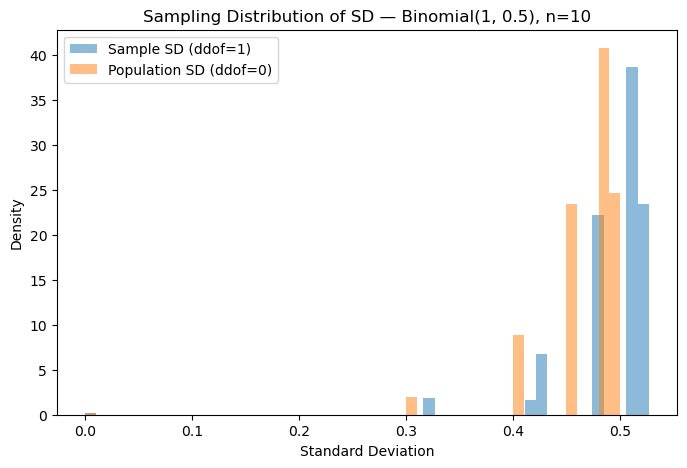

In [698]:
# Plotting the sampling distributions of the standard deviations
plt.figure(figsize=(8, 5))
plt.hist(sample_sd, bins=50, alpha=0.5, label='Sample SD (ddof=1)', density=True)
plt.hist(population_sd, bins=50, alpha=0.5, label='Population SD (ddof=0)', density=True)
plt.title('Sampling Distribution of SD — Binomial(1, 0.5), n=10')
plt.xlabel('Standard Deviation')
plt.ylabel('Density')
plt.legend()
plt.show()


In [699]:
# Compute the total number of successes across all 100,000 binomial draws
# Each element of x is the number of successes in 10 trials
total_successes = x.sum()

# Show total number of successes (expected ≈ 100,000 * 10 * 0.5 = 500,000)
total_successes


500719

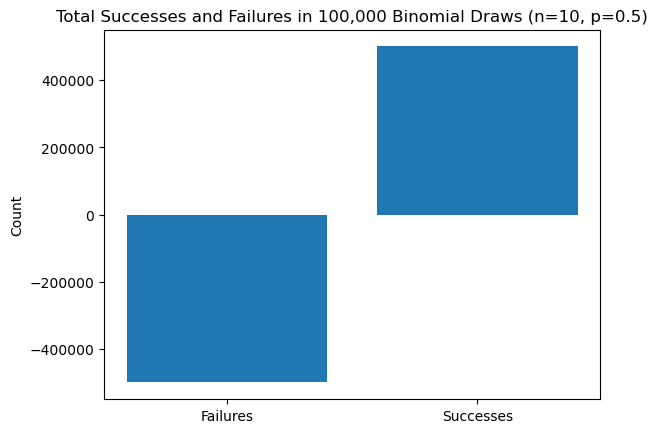

In [700]:
# Create a blank plot.
fig, ax = plt.subplots()

# Create a bar chart.
ax.bar([0, 1], [1000 - total_successes, total_successes])

# Add x labels.
ax.set_xticks([0, 1], labels=['Failures', 'Successes'])

# Add title.
ax.set_title('Total Successes and Failures in 100,000 Binomial Draws (n=10, p=0.5)')

# Add axis label.
ax.set_ylabel('Count');

In [701]:
x2= np.random.binomial(n, p, (num_samples, 2))

# show
x2


array([[2, 3],
       [7, 4],
       [6, 6],
       ...,
       [4, 6],
       [4, 4],
       [5, 6]])

In [702]:
# Count the number of times each value occurs.
uniques, counts = np.unique(x2, return_counts=True)

# Show.
uniques, counts

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([  192,  1939,  8627, 23289, 41144, 49390, 41066, 23448,  8803,
         1904,   198], dtype=int64))

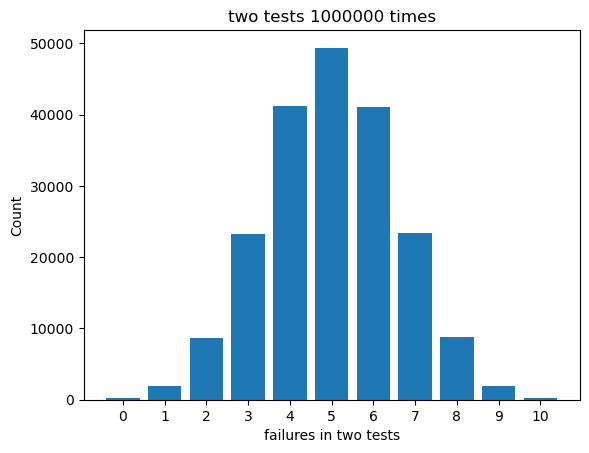

In [703]:
# Create a blank plot.
fig, ax = plt.subplots()

# Create a bar chart.
ax.bar(uniques, counts)

# Set x ticks.
ax.set_xticks(uniques)

# Add title.
ax.set_title('two tests 1000000 times')

# Add axis label.
ax.set_xlabel('failures in two tests')
ax.set_ylabel('Count');

In [704]:
# Flip two coins several times, keeping the individual coin results.
twoflipsind = np.random.binomial(1, 0.5, (1000, 2))

# Show.
twoflipsind

array([[0, 1],
       [0, 0],
       [0, 1],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]])

In [705]:
# Count the number of times each value occurs.
np.unique(twoflipsind, return_counts=True, axis=0)

(array([[0, 0],
        [0, 1],
        [1, 0],
        [1, 1]]),
 array([270, 232, 261, 237], dtype=int64))

In [706]:
# Number of coins to flip.
n = 100

# Number of times to do it.
k = 10000 * n

# Flip two coins several times.
nflips = np.random.binomial(n, 0.5, k)

# Count the number of times each value occurs.
uniques, counts = np.unique(nflips, return_counts=True)

# Show.
uniques, counts

(array([28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
        45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61,
        62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73]),
 array([    2,    11,    20,    54,   116,   222,   436,   828,  1615,
         2636,  4518,  7068, 10992, 15736, 22264, 30037, 39085, 48449,
        57988, 66671, 73263, 78028, 79339, 78007, 73449, 67026, 57757,
        48248, 39102, 29816, 22615, 15843, 11070,  7208,  4367,  2733,
         1549,   875,   467,   267,   126,    57,    29,     7,     3,
            1], dtype=int64))

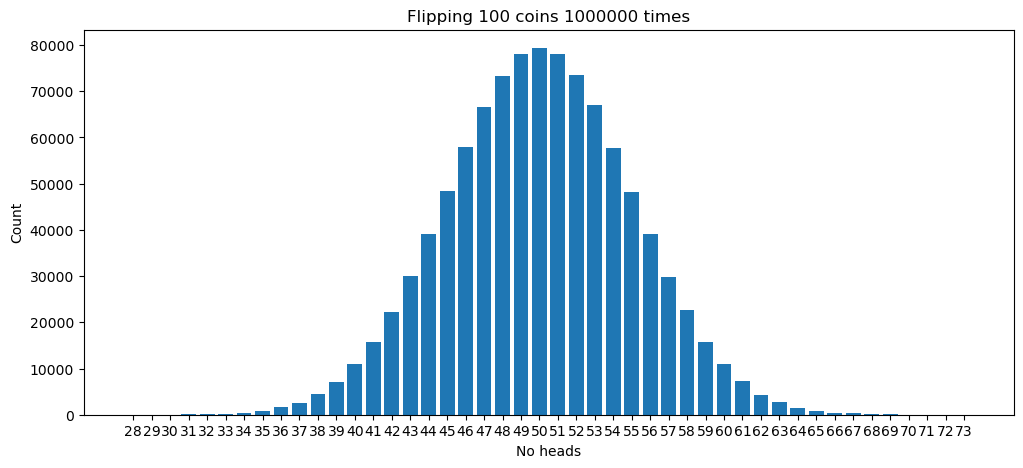

In [707]:
# Create a blank plot.
fig, ax = plt.subplots(figsize=(12, 5))

# Create a bar chart.
ax.bar(uniques, counts)

# Set x ticks.
ax.set_xticks(uniques)

# Add title.
ax.set_title(f'Flipping {n} coins {k} times')

# Add axis label.
ax.set_xlabel('No heads')
ax.set_ylabel('Count');

 ## give explanations and insights into your code

## Problem 3: t-Tests

## Simulation of Type II Error

A **Type II error** occurs when a test **fails to reject the null hypothesis** even though it is false.  

We will simulate this scenario for different mean differences \(d = 0, 0.1, 0.2, \dots, 1.0\) using the following procedure:

### Steps

1. **Set parameters**
   - Number of simulations: 1,000
   - Sample size for each group: 100
   - Standard deviation: 1
   - Significance level: 0.05

2. **For each mean difference \(d\):**
   1. Repeat 1,000 times:
      - Draw **Sample A** of size 100 from the standard normal distribution \(N(0,1)\)
      - Draw **Sample B** of size 100 from \(N(d,1)\)
      - Perform an **independent two-sample t-test** comparing Sample A and Sample B
      - Reject the null hypothesis if **p-value < 0.05**
   2. Record the **proportion of times the null hypothesis is not rejected**  
      → This is the **Type II error rate** for that \(d\).

3. **Plot results**
   - X-axis: mean difference \(d\)
   - Y-axis: proportion of times the null hypothesis is not rejected (Type II error rate)
   - Observe how the Type II error rate **decreases** as the mean difference increases.

### Objective

This simulation helps illustrate that as the **difference between group means increases**, the **power of the test increases**, and the **Type II error rate decreases**.


# Two-Sample t-Test (Pooled Variance)

This markdown document explains the formula and steps for conducting a two-sample t-test assuming equal variances.

---

## Hypotheses

- Null hypothesis: $H_0: \mu_1 = \mu_2$
- Alternative hypothesis: $H_a: \mu_1 \neq \mu_2$

## Step 1: Pooled Variance

The pooled variance combines the variances of both samples:

$$
s_p^2 = \frac{(n_1-1)s_1^2 + (n_2-1)s_2^2}{n_1 + n_2 - 2}
$$

Where:

- $s_1^2$ = sample variance of group 1
- $s_2^2$ = sample variance of group 2
- $n_1, n_2$ = sample sizes

## Step 2: t-Statistic

$$
t = \frac{\bar{X} - \bar{Y}}{s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}
$$

Where:

- $\bar{X}, \bar{Y}$ = sample means
- $s_p = \sqrt{s_p^2}$ = pooled standard deviation

## Step 3: Degrees of Freedom

$$
df = n_1 + n_2 - 2
$$

## Step 4: Decision

- Compare $|t|$ to the critical t-value from the t-distribution with $df$ degrees of freedom.
- Or compute the p-value and compare with significance level $\alpha$ (e.g., 0.05).

## Assumptions

1. Both samples are independent.
2. Both populations are approximately normally distributed.
3. Equal population variances ($\sigma_1^2 = \sigma_2^2$).

In [ ]:
## problem 3: t-Tests
# Author: Finian Doonan

# Set parameters
num_simulations = 1000 # number of simulations
sample_size = 100 # size of each sample
std_dev = 1 # standard deviation of the population
alpha = 0.05 # significance level

In [ ]:
# Predefined p-values for rounding
# These values will be used to round the effect sizes
d_values = np.round(np.arange(0, 1.01, 0.1), 2)

In [ ]:
# Lists to store errors
type2_errors = []

In [ ]:
# Set random seed for reproducibility
# This ensures that the results are consistent across different runs

np.random.seed(123)

 ## give explanations and insights into your code

## Problem 4: ANOVA

Generate three independent samples, each of size 30, from normal distributions with means 0, 0.5, and 1, each with standard deviation 1.

1. Perform a one-way ANOVA to test whether all three means are equal.
2. Perform three independent two-sample t-tests: samples 1 vs 2, 1 vs 3, and 2 vs 3.
3. Compare the conclusions.

Write a short note on why ANOVA is preferred over running several t-tests.

In [709]:
# problem 4: ANOVA
# Author: Finian Doonan

## give explanations and insights into your code

# End